In [ ]:
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [ ]:
def mean_absolute_percentage_error(actual, prediction):
    actual = pd.Series(actual)
    prediction = pd.Series(prediction)
    return 100 * np.mean(np.abs((actual - prediction))/actual)

In [ ]:
dataset = pd.read_excel('day2_final.xlsx')
dataset['VOL'][dataset['VOL'] == dataset['VOL'].max()] = np.NaN
dataset=dataset.fillna(method='backfill')

In [ ]:
data = dataset[['CLOSE','VOL', 'sma_10', 'roc',
       'stoch_k', 'cci', 'rsi', 'MACD_12_26', 'adi']]
# data['OPEN'] = np.log(dataset['OPEN'])
# data['HIGH'] = np.log(dataset['HIGH'])
# data['LOW'] = np.log(dataset['LOW'])
# data['usdrub'] = np.log(dataset['usdrub'])
# data['brent'] = np.log(dataset['brent'])
# data['cac'] = np.log(dataset['cac'].astype('float64'))
# data['ftse'] = np.log(dataset['ftse'])
# data['dedow'] = np.log(dataset['dedow'])
data['OPEN'] = dataset['OPEN'].diff()
data['HIGH'] = dataset['HIGH'].diff()
data['LOW'] = dataset['LOW'].diff()
data['usdrub'] = dataset['usdrub'].diff()
data['brent'] = dataset['brent'].diff()
data['cac'] = dataset['cac'].diff()
data['ftse'] = dataset['ftse'].diff()
data['dedow'] = dataset['dedow'].diff()
# data['CLOSE_lag'] = dataset['CLOSE'].shift(1)
# data['CLOSE_lag_'] = data['CLOSE_lag'].diff()

In [ ]:
data['ret'] = dataset['CLOSE'].diff()

In [ ]:
data['ret_lag'] = data['ret'].shift(1)

In [ ]:
data = data[2:]

In [ ]:
X=data[['OPEN', 'HIGH', 'LOW', 'VOL', 'brent',
       'usdrub', 'sma_10', 'roc', 'stoch_k', 'cci', 'rsi', 'MACD_12_26', 'adi',
       'cac', 'ftse', 'dedow', 'ret_lag']]
Y=data['ret']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, shuffle = False, test_size=0.2)

In [ ]:
X_train.shape

(2762, 17)

In [ ]:
regr = Pipeline([('std', StandardScaler()),
                      ('svr', LinearSVR(C=0.07, epsilon=0, random_state=1))])
regr.fit(X_train, Y_train)

Pipeline(steps=[('std', StandardScaler()),
                ('svr', LinearSVR(C=0.07, epsilon=0, random_state=1))])

In [ ]:
df=pd.DataFrame()

In [ ]:
df['Weight'] = regr.named_steps['svr'].coef_

In [ ]:
df['Variable'] = X_train.columns

In [ ]:
df.sort_values('Weight', inplace=True)

In [ ]:
df.reset_index(inplace=True, drop=True)

In [ ]:
import matplotlib.pyplot as plt

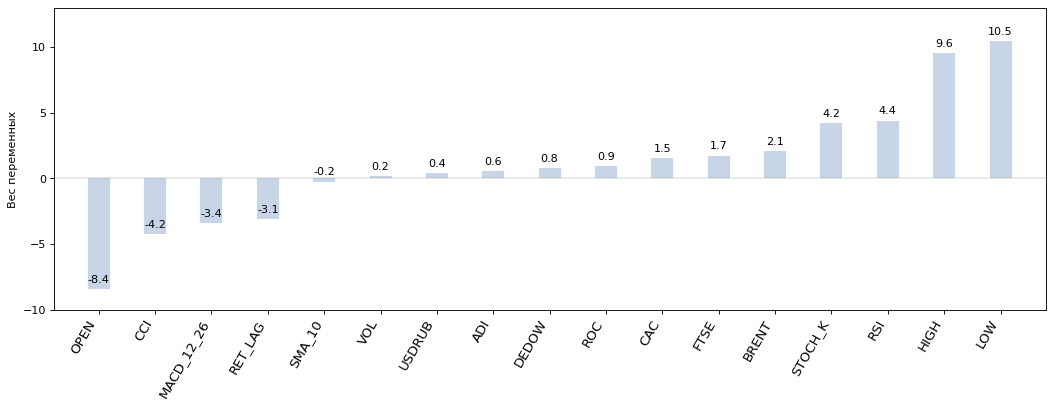

In [ ]:
fig, ax = plt.subplots(figsize=(16,5), facecolor='white', dpi= 80)

plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.3)

ax.vlines(x=df.index, ymin=0, ymax=df.Weight, color='lightsteelblue', alpha=0.7, linewidth=20)

# Annotate Text
for i, Weight in enumerate(df.Weight):
    ax.text(i, Weight+0.5, round(Weight, 1), horizontalalignment='center')


# Title, Label, Ticks and Ylim
ax.set(ylabel='Вес переменных', ylim=(-10, 13))
plt.xticks(df.index, df.Variable.str.upper(), rotation=60, horizontalalignment='right', fontsize=12)

plt.show()

regr = make_pipeline(StandardScaler(), LinearSVR(C=0.11, epsilon=0, random_state=1))
regr.fit(X_train, Y_train)

In [ ]:
y_pred = regr.predict(X_test)

In [ ]:
r2_score(Y_test, y_pred)

0.7717890341381318

0.08 0.7713451491380238

0.07 0.7717890341381318

In [ ]:
mse = mean_squared_error(Y_test[2:], y_pred[2:])
rmse = mse ** 0.5
mape = mean_absolute_percentage_error(Y_test[2:], y_pred[2:])
r2 = r2_score(Y_test[2:], y_pred[2:])
mae = mean_absolute_error(Y_test[2:], y_pred[2:])

In [ ]:
mse

270.31880369099133

In [ ]:
rmse

16.441374750640268

In [ ]:
100 * np.mean(np.abs((Y_test[2:] - y_pred[2:]))/Y_test[2:])

20.22942707291377

In [ ]:
r2

0.7717616451064444

In [ ]:
mae

11.467912142958983

In [ ]:
y_pred = pd.DataFrame(y_pred)

In [ ]:
y_pred.to_csv('ret_SVR_final.csv')

returns

mse
270.31880369099133

rmse
16.441374750640268

mape
20.22942707291377

r2
0.7717616451064444

mae
11.467912142958983

In [ ]:
Y_test = Y_test.reset_index(drop=True)

In [ ]:
Y_test

0      -10.70
1        2.31
2        2.36
3      -12.82
4       18.94
        ...  
686    -12.11
687   -104.77
688     80.53
689    -32.99
690     45.75
Name: ret, Length: 691, dtype: float64

In [ ]:
yyy = dataset['CLOSE'][-692:]

In [ ]:
y_pred_naive = y_pred_naive.reset_index(drop=True)

In [ ]:
(yyy[3454] - yyy[2764])/yyy[2764]

0.5962837700836192

In [ ]:
y_pred_naive = yyy.shift(-1)[1:-1]

In [ ]:
Y_test

0      -10.70
1        2.31
2        2.36
3      -12.82
4       18.94
        ...  
686    -12.11
687   -104.77
688     80.53
689    -32.99
690     45.75
Name: ret, Length: 691, dtype: float64

In [ ]:
profit_naive = 0
profit_hist_naive = []
profitability_naive = 0
profitability_hist_naive = []
for i in range(690):
  if y_pred_naive[i] > 0:
    profit_naive += Y_test[i+1]
    profit_hist_naive.append(profit_naive)
    profitability_naive += Y_test[i+1]/yyy[2764+i]
    profitability_hist_naive.append(profitability_naive)
  if y_pred_naive[i] < 0:
    profit_naive -= Y_test[i+1]
    profit_hist_naive.append(profit_naive)
    profitability_naive -= Y_test[i+1]/yyy[2764+i]
    profitability_hist_naive.append(profitability_naive)

In [ ]:
profitability_naive

0.5164172565625768

In [ ]:
profit = 0
profit_hist = []
profitability = 0
profitability_hist = []
for i in range(691):
  if y_pred[i] > 0:
    profit += Y_test[i]
    profit_hist.append(profit)
    profitability += Y_test[i]/yyy[2763+i]
    profitability_hist.append(profitability)
  if y_pred[i] < 0:
    profit -= Y_test[i]
    profit_hist.append(profit)
    profitability -= Y_test[i]/yyy[2763+i]
    profitability_hist.append(profitability)

In [ ]:
profitability

5.09618404495609

In [ ]:
profit

15593.399999999992

In [ ]:
profitability_hist = pd.DataFrame(profitability_hist)

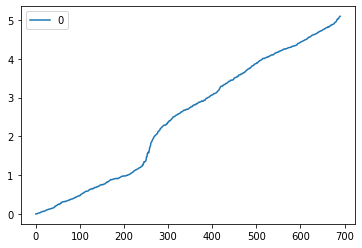

In [ ]:
profitability_hist.plot()

In [ ]:
2465.94/profitability_hist[0][0]

570770.62071029

In [ ]:
plpl = profitability_hist * 570770.62071029

In [ ]:
plpl

,0
0,2.465940e+03
1,3.000616e+03
2,2.454878e+03
3,5.416608e+03
4,9.815029e+03
...,...
686,2.870133e+06
687,2.885281e+06
688,2.897241e+06
689,2.902040e+06


In [ ]:
profit_hist.diff()

,0
0,NaN
1,2.31
2,-2.36
3,12.82
4,18.94
...,...
686,-12.11
687,104.77
688,80.53
689,32.99


In [ ]:
df = pd.DataFrame()

In [ ]:
df['MOEX'] = dataset['CLOSE'][-691:]

In [ ]:
df

,MOEX,SVR
2764,2465.94,2.465940e+03
2765,2468.25,3.000616e+03
2766,2470.61,2.454878e+03
2767,2457.79,5.416608e+03
2768,2476.73,9.815029e+03
...,...,...
3450,3947.82,2.870133e+06
3451,3843.05,2.885281e+06
3452,3923.58,2.897241e+06
3453,3890.59,2.902040e+06


In [ ]:
df['SVR'] = np.array(plpl)

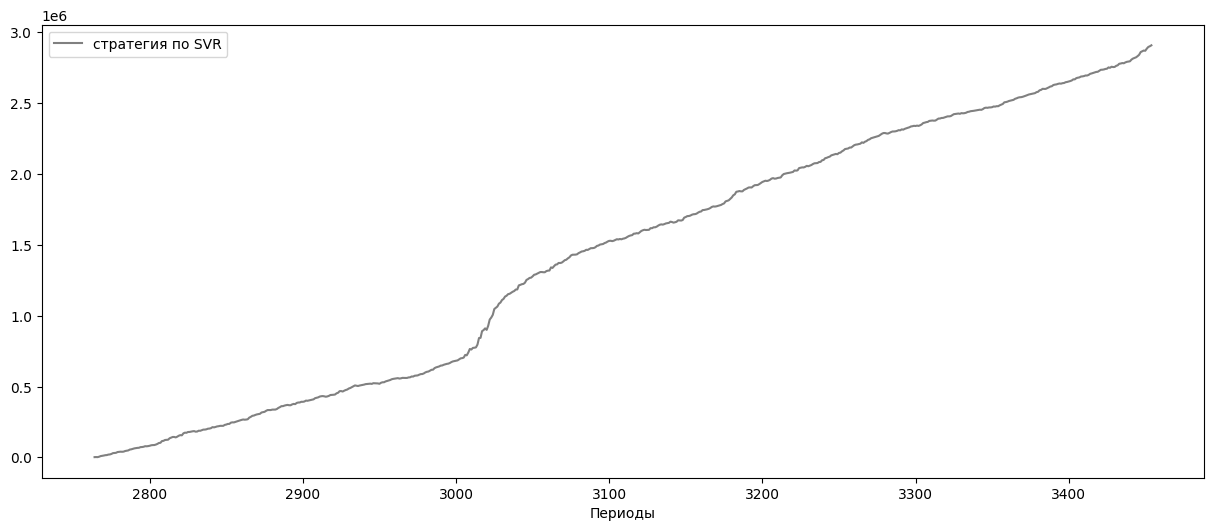

In [ ]:
plt.figure(figsize=(15, 6), dpi=100)
  
# using plot method to plot open prices.
# in plot method we set the label and color of the curve.
# df['MOEX'].plot(label='Прирост MOEX', color = 'gray')
df['SVR'].plot(label='стратегия по SVR', color = 'gray')
  
# adding Label to the x-axis
plt.xlabel('Периоды')
  
# adding legend to the curve
plt.legend()

In [ ]:
profit_hist = pd.DataFrame(profit_hist)

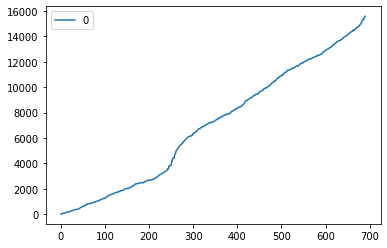

In [ ]:
profit_hist.plot()

In [ ]:
data = dataset[['VOL', 'sma_10', 'roc',
       'stoch_k', 'cci', 'rsi', 'MACD_12_26', 'adi']]
data['OPEN'] = np.log(dataset['OPEN'])
data['HIGH'] = np.log(dataset['HIGH'])
data['LOW'] = np.log(dataset['LOW'])
data['CLOSE'] = np.log(dataset['CLOSE'])
data['usdrub'] = np.log(dataset['usdrub'])
data['brent'] = np.log(dataset['brent'])
data['cac'] = np.log(dataset['cac'].astype('float64'))
data['ftse'] = np.log(dataset['ftse'])
data['dedow'] = np.log(dataset['dedow'])
data['CLOSE_lag'] = dataset['CLOSE'].shift(1)
data['CLOSE_lag2'] = dataset['CLOSE'].shift(2)
data['CLOSE_lag3'] = dataset['CLOSE'].shift(3)
data['CLOSE_lag4'] = dataset['CLOSE'].shift(4)
# data['CLOSE_lag_'] = data['CLOSE_lag'].diff()

In [ ]:
data = data[4:]

In [ ]:
X=data[['OPEN', 'HIGH', 'LOW', 'VOL', 'brent',
        'sma_10', 'roc', 'stoch_k', 'cci', 'rsi', 'MACD_12_26', 'adi',
       'cac', 'ftse', 'dedow']]#, 'CLOSE_lag','usdrub', 'CLOSE_lag2', 'CLOSE_lag3', 'CLOSE_lag4']]
Y=data['CLOSE']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, shuffle = False, test_size=0.2)

In [ ]:
regr = make_pipeline(StandardScaler(), LinearSVR(C=0.1, epsilon=0, random_state=1))
regr.fit(X_train, Y_train)
y_pred = regr.predict(X_test)
r2_score(Y_test, y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


0.9989809192316061

In [ ]:
y_pred_n = pd.DataFrame(np.exp(y_pred))

In [ ]:
y_pred_n.to_csv('y_pred_SVR_final.csv')

In [ ]:
mse = mean_squared_error(np.exp(Y_test[2:]), np.exp(y_pred[2:]))
rmse = mse ** 0.5
mape = mean_absolute_percentage_error(np.exp(Y_test[2:]), np.exp(y_pred[2:]))
r2 = r2_score(np.exp(Y_test[2:]), np.exp(y_pred[2:]))
mae = mean_absolute_error(np.exp(Y_test[2:]), np.exp(y_pred[2:]))

In [ ]:
mse

206.2098572559508

In [ ]:
rmse

14.360008957377108

In [ ]:
100 * np.mean(np.abs((np.exp(Y_test[2:]) - np.exp(y_pred[2:])))/np.exp(Y_test[2:]))

0.3161871726478267

In [ ]:
r2

0.9991959189481086

In [ ]:
mae

9.69616021121151


mse
206.2098572559508

rmse
14.360008957377108

mape
0.3161871726478267

r2
0.9991959189481086

mae
9.69616021121151

In [ ]:
y_pred.shape

(691,)

In [ ]:
profit = 0
for i in range(691):
  if y_pred[i] > 0:
    

In [ ]:
lstm = pd.read_csv('res_lstm_checked_day.csv')

In [ ]:
lstm = lstm['0']

In [ ]:
yyy[4:].diff()

2767       NaN
2768     18.94
2769      6.97
2770      9.58
2771     10.95
         ...  
3450    -12.11
3451   -104.77
3452     80.53
3453    -32.99
3454     45.75
Name: CLOSE, Length: 688, dtype: float64

In [ ]:
Y_test_l = Y_test[4:]

In [ ]:
lstm

0      20.103535
1      14.913623
2       4.840059
3     -11.213604
4     -14.136045
         ...    
682    46.740166
683   -66.431689
684    60.551191
685    18.366367
686    69.647861
Name: 0, Length: 687, dtype: float64

In [ ]:
Y_test[4:]

4       18.94
5        6.97
6        9.58
7       10.95
8        3.58
        ...  
686    -12.11
687   -104.77
688     80.53
689    -32.99
690     45.75
Name: ret, Length: 687, dtype: float64

In [ ]:
profit_l = 0
profit_hist_l = []
profitability_l = 0
profitability_hist_l = []
for i in range(687):
  if lstm[i] > 0:
    profit_l += Y_test[i+4]
    profit_hist_l.append(profit_l)
    profitability_l += Y_test[i+4]/yyy[2767+i]
    profitability_hist_l.append(profitability_l)
  if lstm[i] < 0:
    profit_l -= Y_test[i+4]
    profit_hist_l.append(profit_l)
    profitability_l -= Y_test[i+4]/yyy[2767+i]
    profitability_hist_l.append(profitability_l)

In [ ]:
profitability_hist_l = pd.DataFrame(profitability_hist_l)

In [ ]:
profitability_hist_l.to_csv('profit_l.csv')

In [ ]:
mse = mean_squared_error(Y_test[4:], np.exp(lstm))
rmse = mse ** 0.5
mape = mean_absolute_percentage_error(Y_test[4:], np.exp(lstm))
r2 = r2_score(Y_test[4:], np.exp(lstm))
mae = mean_absolute_error(Y_test[4:], np.exp(lstm))

In [ ]:
mse

5522.060543519486

In [ ]:
rmse

74.31056818191801

In [ ]:
Y_test

2764    -10.70
2765      2.31
2766      2.36
2767    -12.82
2768     18.94
         ...  
3450    -12.11
3451   -104.77
3452     80.53
3453    -32.99
3454     45.75
Name: ret, Length: 691, dtype: float64

In [ ]:
lstm = np.exp(lstm)

In [ ]:
lstm = lstm-lstm.shift(-1)

In [ ]:
np.abs((Y_test[4:-1] - lstm[:-1]))#/Y_test[4:-1]

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
3449   NaN
3450   NaN
3451   NaN
3452   NaN
3453   NaN
Length: 1372, dtype: float64

In [ ]:
Y_test = Y_test.reset_index(drop=True)

In [ ]:
lstm 

0     -12.160081
1     -19.653565
2     -27.003697
3      -6.502007
4      -1.151279
         ...    
682    -8.400257
683    46.451858
684    -9.193343
685     5.529455
686          NaN
Name: 0, Length: 687, dtype: float64

In [ ]:
100 * np.mean(np.abs((Y_test[4:-1] - lstm[:-1]))/Y_test[4:-1])

68.91415416698689

In [ ]:
r2

0.9784194828748897

In [ ]:
mae

56.02281314402735


mse
4160.549620798516

rmse
64.50232260003136

r2
-2.50364233751524

mae
47.90309081320512

In [ ]:
mean_absolute_error(Y_test[:-1], Y_test.shift(-1)[:-1])

34.961840579710156

In [ ]:
mean_absolute_percentage_error(Y_test[:-1], Y_test.shift(-1)[:-1])

44.15090574287804

In [ ]:
profits = pd.DataFrame(profitability_hist)

In [ ]:
profits.to_csv('profit_svr.csv')